In [ ]:
!pip install --upgrade diffusers transformers accelerate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 64.4 MB/s eta 0:00:00


In [ ]:
!pip install openvino-dev
!pip install optimum[openvino]
!pip install transformers
!pip install diffusers
!pip install accelerate


In [ ]:
!pip install --upgrade huggingface_hub


model_index.json:   0%|          | 0.00/545 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

text_encoder/openvino_model.xml:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/827 [00:00<?, ?B/s]

unet/openvino_model.xml:   0%|          | 0.00/7.79M [00:00<?, ?B/s]

vae_decoder/openvino_model.xml:   0%|          | 0.00/1.12M [00:00<?, ?B/s]

openvino_model.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

openvino_model.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

openvino_model.bin:   0%|          | 0.00/99.0M [00:00<?, ?B/s]

Compiling the vae_decoder to CPU ...
Compiling the unet to CPU ...
Compiling the text_encoder to CPU ...


  0%|          | 0/51 [00:00<?, ?it/s]

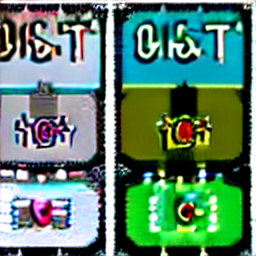

In [ ]:
from optimum.intel.openvino.modeling_diffusion import OVStableDiffusionPipeline
from PIL import Image

batch_size = 1
num_images_per_prompt = 1
height = 256
width = 256

# load the model and reshape to static shapes for faster inference
model_id = "helenai/runwayml-stable-diffusion-v1-5-ov"
stable_diffusion = OVStableDiffusionPipeline.from_pretrained(model_id, compile=False)
stable_diffusion.reshape(batch_size=batch_size, height=height, width=width, num_images_per_prompt=num_images_per_prompt)
stable_diffusion.compile()

# generate image!
prompt = "cat holding a sign hello world"
images = stable_diffusion(prompt, height=height, width=width, num_images_per_prompt=num_images_per_prompt).images

# Display the image
images[0].save("result.png")
display(images[0])